In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.shape)

(891, 12)


In [15]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

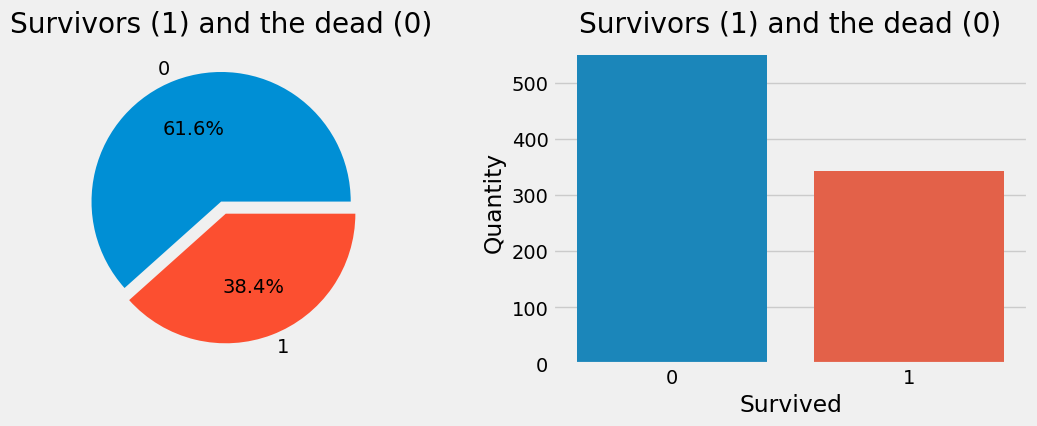

In [68]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train['Survived'].value_counts().plot.pie( 
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) and the dead (0)') 
ax[0].set_ylabel('') 
sns.countplot(x="Survived", data=train, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) and the dead (0)') 
plt.show() 

Text(0.5, 1.0, 'Survivors(1) and deceased (0) : men and women')

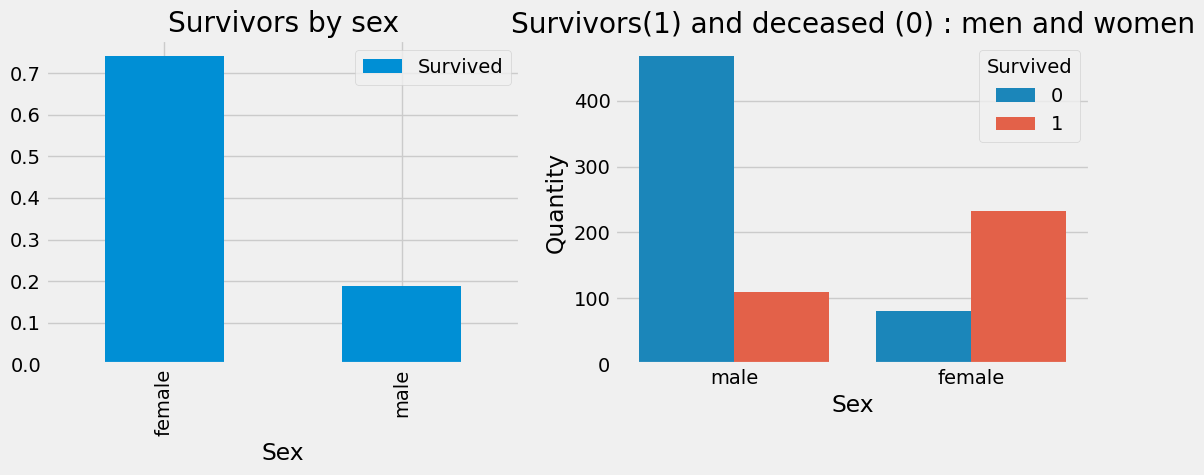

In [61]:
f,ax=plt.subplots(1,2, figsize=(12,4))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x='Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors(1) and deceased (0) : men and women')

In [81]:
# train["CabinBool"]=(train["Cabin"].notnull().astype('int'))
# test["CabinBool"]=(test["Cabin"].notnull().astype('int'))
# train=train.drop(['Cabin'],axis=1)
# test=test.drop(['Cabin'],axis=1)
# train=train.drop(['Ticket'],axis=1)
# test=test.drop(['Ticket'],axis=1)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [82]:
train=train.fillna({"Embarked":"S"})

In [87]:
train["Age"]=train["Age"].fillna(-0.5)
test["Age"]=test["Age"].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager','Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup']=pd.cut(train["Age"],bins,labels=labels)
test['AgeGroup']=pd.cut(test["Age"],bins,labels=labels)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Young Adult


In [93]:
combine=[train,test]

for dataset in combine: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
  
pd.crosstab(train['Title'], train['Sex']) 
  
# replace various titles with more common names 
for dataset in combine: 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 
                                                 'Rev', 'Jonkheer', 'Dona'], 
                                                'Rare') 
  
    dataset['Title'] = dataset['Title'].replace( 
        ['Countess', 'Lady', 'Sir'], 'Royal') 
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 
  
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 
  
# map each of the title groups to a numerical value 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Royal": 5, "Rare": 6} 
for dataset in combine: 
    dataset['Title'] = dataset['Title'].map(title_mapping) 
    dataset['Title'] = dataset['Title'].fillna(0)
print(dataset)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch      Fare Embarked  CabinBool     AgeGroup  \
0      male  34.5      0      0  

In [100]:
mr_age=train[train["Title"]==1]["AgeGroup"].mode()
miss_age = train[train["Title"] == 2]["AgeGroup"].mode()  # Student 
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()  # Adult 
master_age = train[train["Title"] == 4]["AgeGroup"].mode()  # Baby 
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()  # Adult 
rare_age = train[train["Title"] == 6]["AgeGroup"].mode()  # Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 
                     3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"} 
  
for x in range(len(train["AgeGroup"])): 
    if train["AgeGroup"][x] == "Unknown": 
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]] 
  
for x in range(len(test["AgeGroup"])): 
    if test["AgeGroup"][x] == "Unknown": 
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [101]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 
               'Student': 4, 'Young Adult': 5, 'Adult': 6,  
               'Senior': 7} 
train['AgeGroup'] = train['AgeGroup'].map(age_mapping) 
test['AgeGroup'] = test['AgeGroup'].map(age_mapping) 
  
train.head() 

train = train.drop(['Age'], axis=1) 
test = test.drop(['Age'], axis=1)

In [102]:
train = train.drop(['Name'], axis=1) 
test = test.drop(['Name'], axis=1) 

In [103]:
sex_mapping = {"male": 0, "female": 1} 
train['Sex'] = train['Sex'].map(sex_mapping) 
test['Sex'] = test['Sex'].map(sex_mapping) 
  
embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
train['Embarked'] = train['Embarked'].map(embarked_mapping) 
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [104]:
for x in range(len(test["Fare"])): 
    if pd.isnull(test["Fare"][x]): 
        pclass = test["Pclass"][x]  # Pclass = 3 
        test["Fare"][x] = round( 
            train[train["Pclass"] == pclass]["Fare"].mean(), 4) 

train['FareBand'] = pd.qcut(train['Fare'], 4,  
                            labels=[1, 2, 3, 4]) 
test['FareBand'] = pd.qcut(test['Fare'], 4,  
                           labels=[1, 2, 3, 4]) 
  

train = train.drop(['Fare'], axis=1) 
test = test.drop(['Fare'], axis=1) 

In [109]:
from sklearn.model_selection import train_test_split 

predictors = train.drop(['Survived', 'PassengerId'], axis=1) 
target = train["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
    predictors, target, test_size=0.25, random_state=0) 

In [110]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
  
randomforest = RandomForestClassifier() 
  
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 
 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print(acc_randomforest)

82.06


In [108]:
ids = test['PassengerId'] 
predictions = randomforest.predict(test.drop('PassengerId', axis=1)) 

output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
output.to_csv('resultfile.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
